# Capítulo 8 - Detecção de anomalias

## Bibliotecas básicas e outras inicializações

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

## Carregamento dos dados

In [2]:
dados = pd.read_excel('datasets/Sample - Superstore.xls')
dados.columns = ['id_registro', 'id_pedido', 'data_pedido', 'data_envio', 'modo_envio', 'id_cliente', 'nome_cliente', 
                 'segmento', 'pais', 'cidade', 'estado', 'codigo_postal', 'regiao', 'id_produto', 'categoria', 'subcategoria', 
                 'nome_produto', 'vendas', 'quantidade', 'desconto', 'lucro']

print(f'Linhas: {dados.shape[0]} | Colunas: {dados.shape[1]}')
dados.sample()

Linhas: 9994 | Colunas: 21


,id_registro,id_pedido,data_pedido,data_envio,modo_envio,id_cliente,nome_cliente,segmento,pais,cidade,...,codigo_postal,regiao,id_produto,categoria,subcategoria,nome_produto,vendas,quantidade,desconto,lucro
9146,9147,US-2016-165505,2016-01-23,2016-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,5408,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914


## Informação dos dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_registro    9994 non-null   int64         
 1   id_pedido      9994 non-null   object        
 2   data_pedido    9994 non-null   datetime64[ns]
 3   data_envio     9994 non-null   datetime64[ns]
 4   modo_envio     9994 non-null   object        
 5   id_cliente     9994 non-null   object        
 6   nome_cliente   9994 non-null   object        
 7   segmento       9994 non-null   object        
 8   pais           9994 non-null   object        
 9   cidade         9994 non-null   object        
 10  estado         9994 non-null   object        
 11  codigo_postal  9994 non-null   int64         
 12  regiao         9994 non-null   object        
 13  id_produto     9994 non-null   object        
 14  categoria      9994 non-null   object        
 15  subcategoria   9994 n

## Descrição dos dados

In [4]:
dados.drop(['id_registro', 'codigo_postal'], axis=1).describe().round(2)

,vendas,quantidade,desconto,lucro
count,9994.00,9994.00,9994.00,9994.00
mean,229.86,3.79,0.16,28.66
std,623.25,2.23,0.21,234.26
min,0.44,1.00,0.00,-6599.98
25%,17.28,2.00,0.00,1.73
50%,54.49,3.00,0.20,8.67
75%,209.94,5.00,0.20,29.36
max,22638.48,14.00,0.80,8399.98


## Detecção univariada de anomalias

### Distribuição de vendas

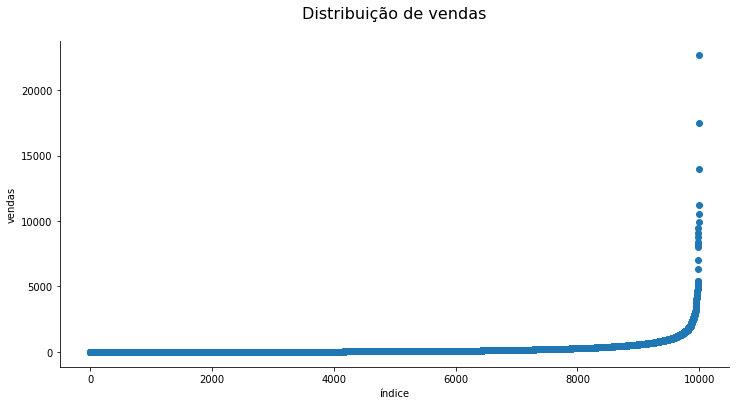

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(range(dados.shape[0]), np.sort(dados['vendas'].values))
plt.xlabel('índice')
plt.ylabel('vendas')
plt.title('Distribuição de vendas', y=1.05, fontsize=16)
sns.despine()

Assimetria: 12.972752
Curtose: 305.311753


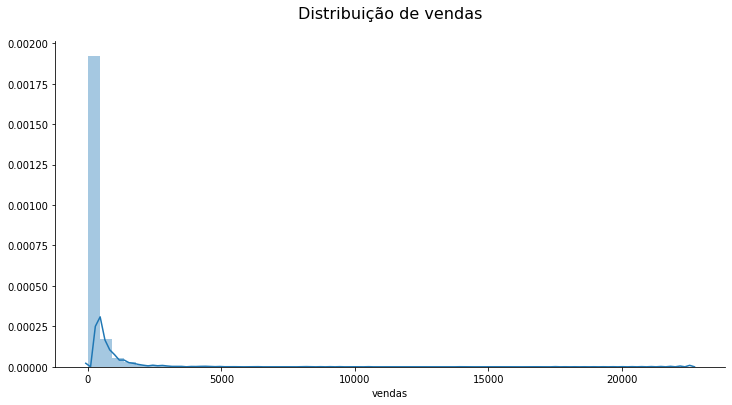

In [6]:
print("Assimetria: %f" % dados['vendas'].skew())
print('Curtose: %f' % dados['vendas'].kurt())

plt.figure(figsize=(12, 6))
sns.distplot(dados['vendas'])
plt.title('Distribuição de vendas', y=1.05, fontsize=16)
sns.despine()

### Distribuição dos lucros

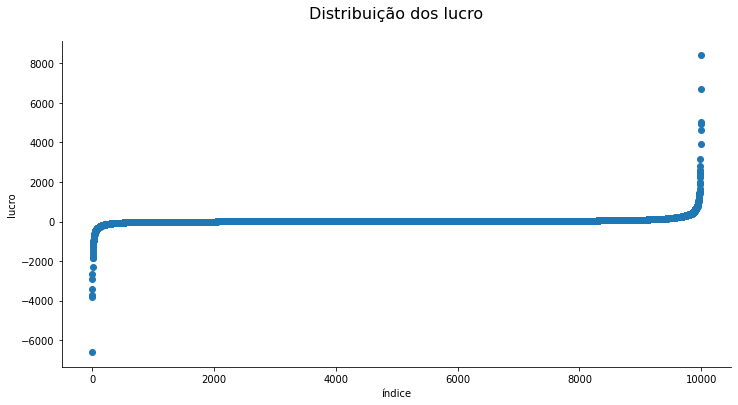

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(range(dados.shape[0]), np.sort(dados['lucro'].values))
plt.xlabel('índice')
plt.ylabel('lucro')
plt.title('Distribuição dos lucro', y=1.05, fontsize=16)
sns.despine()

Assimetria: 7.561432
Curtose: 397.188515


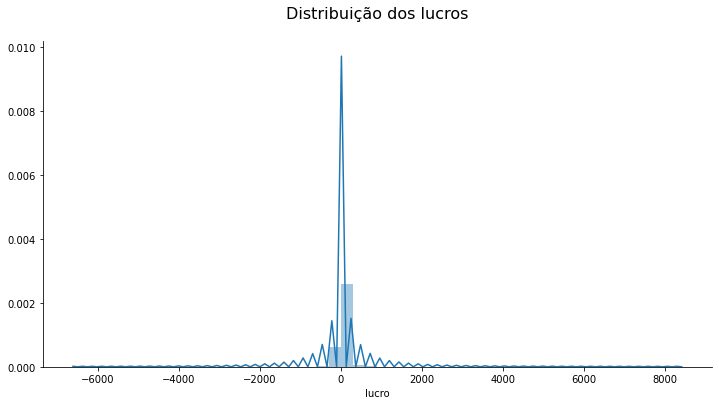

In [8]:
print("Assimetria: %f" % dados['lucro'].skew())
print('Curtose: %f' % dados['lucro'].kurt())

plt.figure(figsize=(12, 6))
sns.distplot(dados['lucro'])
plt.title('Distribuição dos lucros', y=1.05, fontsize=16)
sns.despine()

### Detecção univariada de anomalias

In [9]:
from sklearn.ensemble import IsolationForest

def univariateAnomalyDetection(column):
    """
        - Treina IsolationForest usando os dados de venda
        - Armazena as vendas em um array NumPy
        - Calcula a pontuação da anomalia para cada observação
        - Classificou cada observação como outlier ou não outlier
        - A visualização destaca as regiões onde caem os outliers
    """
    
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(dados[column].values.reshape(-1, 1))
    xx = np.linspace(dados[column].min(), dados[column].max(), len(dados)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    plt.figure(figsize=(12, 6))
    plt.plot(xx, anomaly_score, label='pontuação de anomalia')
    plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=.4, 
                     label='região de outliers')
    plt.legend()
    plt.ylabel('pontuação de anomalia')
    plt.xlabel(column)
    plt.show()

#### Vendas
> Parece que as vendas que excedem 1000 seriam consideradas como outlier

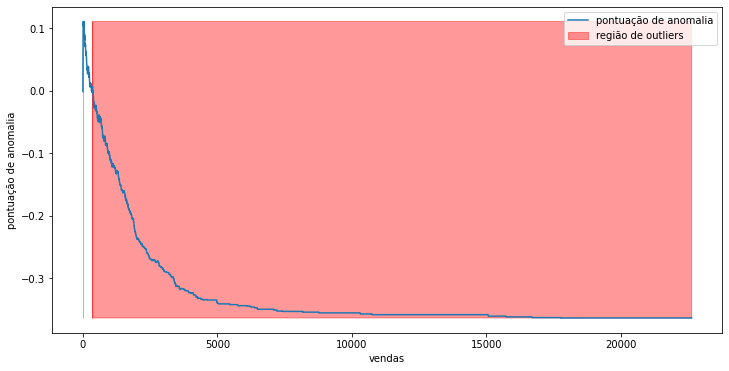

In [10]:
univariateAnomalyDetection('vendas')

#### Lucros

> Parece que o lucro abaixo de -100 ou superior a 100 seria considerado um valor atípico

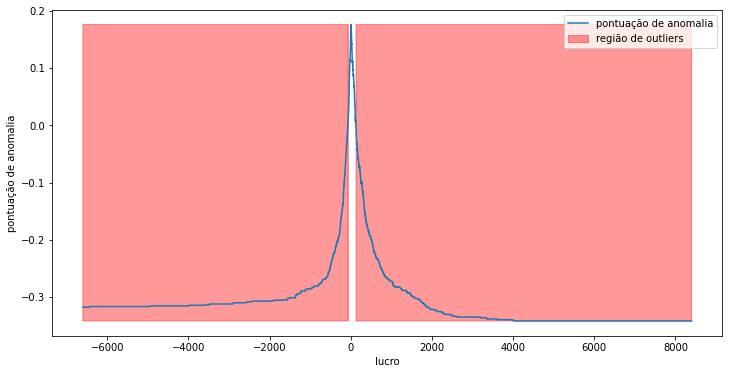

In [11]:
univariateAnomalyDetection('lucro')